# CNN

## Fashion MNIST

In [1]:
import tensorflow as tf

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

In [3]:
print(X_train.shape, X_test.shape)
X_train = X_train.reshape(-1, 28, 28, 1) # -1(맨뒤에) 28,28 채널을 1개 만든다
X_test = X_test.reshape(-1, 28, 28, 1)

print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


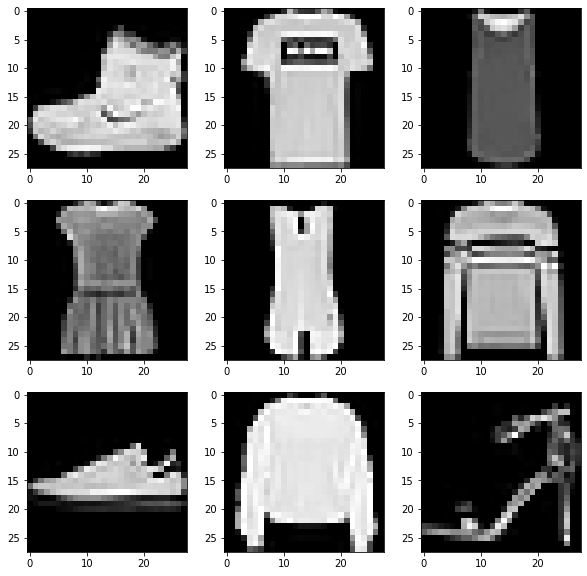

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
for c in range(9):
  plt.subplot(3, 3, c+1)
  plt.imshow(X_train[c].reshape(28, 28), cmap = 'gray')

plt.show()

In [5]:
model = tf.keras.Sequential([
  # kernel == filter, filters는 filtersize
  tf.keras.layers.Conv2D(input_shape = (28, 28, 1), kernel_size = (3, 3), filters = 16), 
  tf.keras.layers.Conv2D(kernel_size = (3, 3), filters = 32), 
  tf.keras.layers.Conv2D(kernel_size = (3, 3), filters = 64),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units = 128, activation = 'relu'),
  tf.keras.layers.Dense(units = 10, activation = 'softmax')
])

# model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])와 같다.
model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3965056   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 3,989,642
Trainable params: 3,989,642
Non-trainable params: 0
______________________________________________

In [6]:
history = model.fit(X_train, y_train, epochs = 25, validation_split = 0.25)

Epoch 1/25
1407/1407 [==============================] - 9s 4ms/step - loss: 0.6925 - accuracy: 0.7840 - val_loss: 0.3709 - val_accuracy: 0.8662
Epoch 2/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.3348 - accuracy: 0.8792 - val_loss: 0.3705 - val_accuracy: 0.8645
Epoch 3/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2672 - accuracy: 0.9030 - val_loss: 0.3946 - val_accuracy: 0.8593
Epoch 4/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2139 - accuracy: 0.9248 - val_loss: 0.4411 - val_accuracy: 0.8751
Epoch 5/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.1822 - accuracy: 0.9343 - val_loss: 0.4441 - val_accuracy: 0.8722
Epoch 6/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.1548 - accuracy: 0.9443 - val_loss: 0.4748 - val_accuracy: 0.8678
Epoch 7/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.1304 - accuracy: 0.9541 - val_loss: 0.5613 - val_accuracy:

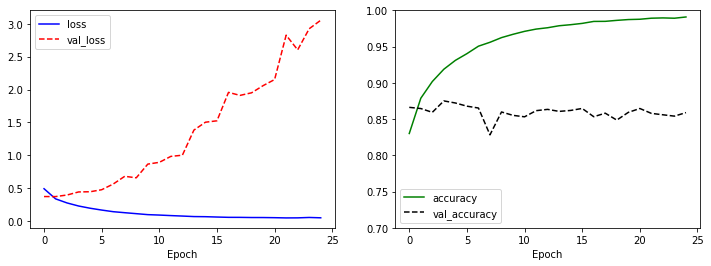

313/313 [==============================] - 1s 2ms/step - loss: 3.2735 - accuracy: 0.8530


[3.2735071182250977, 0.8529999852180481]

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(X_test, y_test)

### 개선(Pooling Layer, Dropout)

In [8]:
model = tf.keras.Sequential([
  # kernel == filter, filters는 filtersize
  tf.keras.layers.Conv2D(input_shape = (28, 28, 1), kernel_size = (3, 3), filters = 32), 
  tf.keras.layers.MaxPool2D(strides = (2, 2)),
  tf.keras.layers.Conv2D(kernel_size = (3, 3), filters = 64), 
  tf.keras.layers.MaxPool2D(strides = (2, 2)),
  tf.keras.layers.Conv2D(kernel_size = (3, 3), filters = 128),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units = 128, activation = 'relu'),
  tf.keras.layers.Dense(units = 10, activation = 'softmax')
])

# model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])와 같다.
model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [9]:
history = model.fit(X_train, y_train, epochs = 25, validation_split = 0.25)

Epoch 1/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.6242 - accuracy: 0.7712 - val_loss: 0.3684 - val_accuracy: 0.8688
Epoch 2/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.3170 - accuracy: 0.8825 - val_loss: 0.3410 - val_accuracy: 0.8775
Epoch 3/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2725 - accuracy: 0.9009 - val_loss: 0.3002 - val_accuracy: 0.8893
Epoch 4/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2377 - accuracy: 0.9139 - val_loss: 0.3230 - val_accuracy: 0.8841
Epoch 5/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2053 - accuracy: 0.9253 - val_loss: 0.3147 - val_accuracy: 0.8928
Epoch 6/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.1855 - accuracy: 0.9321 - val_loss: 0.3617 - val_accuracy: 0.8867
Epoch 7/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.1647 - accuracy: 0.9406 - val_loss: 0.3429 - val_accuracy:

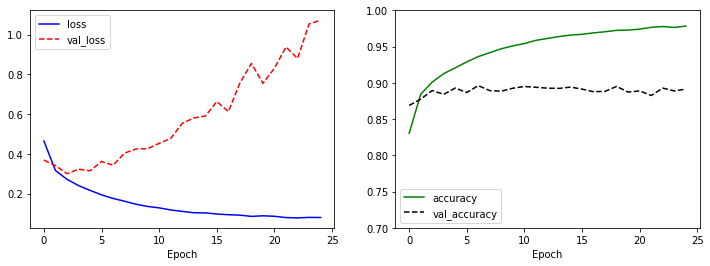

313/313 [==============================] - 1s 2ms/step - loss: 1.1220 - accuracy: 0.8844


[1.1219546794891357, 0.8844000101089478]

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(X_test, y_test)

In [11]:
model = tf.keras.Sequential([
  # kernel == filter, filters는 filtersize
  tf.keras.layers.Conv2D(input_shape = (28, 28, 1), kernel_size = (3, 3), filters = 32), 
  tf.keras.layers.MaxPool2D(strides = (2, 2)),
  tf.keras.layers.Conv2D(kernel_size = (3, 3), filters = 64), 
  tf.keras.layers.MaxPool2D(strides = (2, 2)),
  tf.keras.layers.Conv2D(kernel_size = (3, 3), filters = 128),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units = 128, activation = 'relu'),
  tf.keras.layers.Dropout(rate = 0.3),
  tf.keras.layers.Dense(units = 10, activation = 'softmax')
])

# model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])와 같다.
model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [12]:
history = model.fit(X_train, y_train, epochs=25, validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.7018 - accuracy: 0.7490 - val_loss: 0.4020 - val_accuracy: 0.8567
Epoch 2/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.3658 - accuracy: 0.8687 - val_loss: 0.3431 - val_accuracy: 0.8742
Epoch 3/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.3106 - accuracy: 0.8904 - val_loss: 0.3134 - val_accuracy: 0.8885
Epoch 4/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2806 - accuracy: 0.8991 - val_loss: 0.3851 - val_accuracy: 0.8748
Epoch 5/25
1407/1407 [==============================] - 6s 5ms/step - loss: 0.2694 - accuracy: 0.9026 - val_loss: 0.3271 - val_accuracy: 0.8850
Epoch 6/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2445 - accuracy: 0.9114 - val_loss: 0.3099 - val_accuracy: 0.8945
Epoch 7/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2369 - accuracy: 0.9140 - val_loss: 0.3307 - val_accuracy:

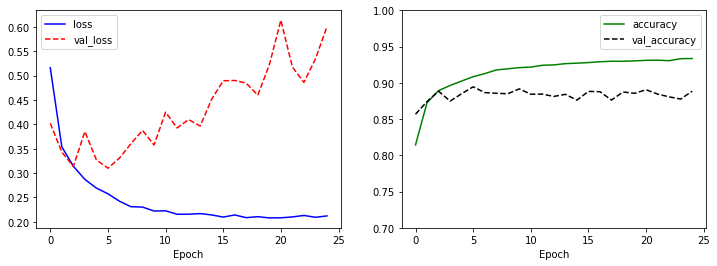

313/313 [==============================] - 1s 2ms/step - loss: 0.6244 - accuracy: 0.8880


[0.6243623495101929, 0.8880000114440918]

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(X_test, y_test)

## VGGNet 스타일을 이용해서 퍼포먼스 높이기


In [14]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
  tf.keras.layers.Dropout(rate=0.5),
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
  tf.keras.layers.Dropout(rate=0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=512, activation='relu'),
  tf.keras.layers.Dropout(rate=0.5),
  tf.keras.layers.Dense(units=256, activation='relu'),
  tf.keras.layers.Dropout(rate=0.5),
  tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 256)        

In [15]:
history = model.fit(X_train, y_train, epochs=25, validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.8703 - accuracy: 0.6754 - val_loss: 0.3747 - val_accuracy: 0.8625
Epoch 2/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3966 - accuracy: 0.8555 - val_loss: 0.2716 - val_accuracy: 0.8999
Epoch 3/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3350 - accuracy: 0.8807 - val_loss: 0.2564 - val_accuracy: 0.9053
Epoch 4/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3028 - accuracy: 0.8923 - val_loss: 0.2478 - val_accuracy: 0.9109
Epoch 5/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2920 - accuracy: 0.8946 - val_loss: 0.2326 - val_accuracy: 0.9163
Epoch 6/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2831 - accuracy: 0.8981 - val_loss: 0.2189 - val_accuracy: 0.9179
Epoch 7/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2634 - accuracy: 0.9017 - val_loss: 0.2209 - val_accuracy:

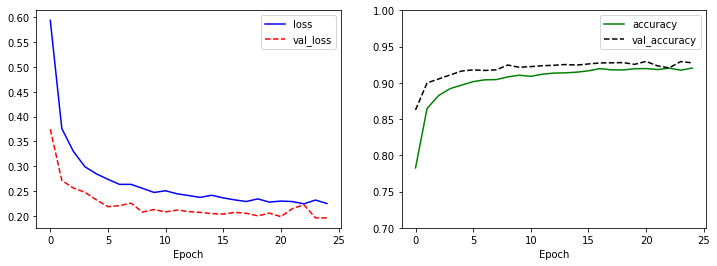

313/313 [==============================] - 1s 2ms/step - loss: 0.2143 - accuracy: 0.9230


[0.21432951092720032, 0.9229999780654907]

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(X_test, y_test)